In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
df1 = pd.read_csv("C:/Users/Mansi V Jain/Desktop/Data Science Projects/Real Estate Price Prediction/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# to know number of rows and columns
df1.shape

(13320, 9)

In [4]:
# Lets explore area
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# dropping unnecessary columns
df1.drop(['area_type','society','balcony','availability'],axis='columns',inplace=True)
df1.shape

(13320, 5)

In [6]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning 

i. Handling NaN values

In [7]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Since dataset is huge, and number of na values are relatively less, decision to drop those rows
df1.dropna(inplace=True)
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
# Lets explore size attribute
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# since bedroom and BHK mean the same, we can reduce the unique values
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
# Notice the drastic change in the number of unique values

In [13]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
# 43 bedrooms and 2400 bhk doesn't sound right!! have to fix these errors

In [15]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# notice there are ranges, we must convert them to normal values
# below function will help you know if the above values are normal or no by trying to convert them to float, ranges wont be convertable
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
# Lets handle the above non uniformities
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try: 
        return float(x)
    except: 
        return None

In [19]:
# Lets check working of the function
convert_sqft_to_num('2333')

2333.0

In [20]:
convert_sqft_to_num('2000-4000')

3000.0

In [21]:
df2 = df1.copy()
df2['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering and dimensionality reduction techniques

In [22]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df3 =df2.copy()
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
# Lets explore location column
# location: categorical feature
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df3.location.unique())

1304

#### Usually we convert text data  using e=one hot encoding, but 1304 is a huge number! we'll end up having 1304 columns in our dataframe -  Dimensionality curse/High Dimensionality problem

Techniques to reduce:<br>
i. other category

In [26]:
# to remove leading or trailing spaces
df3.locaton = df3.location.apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\Mansi V Jain\AppData\Local\Temp\ipykernel_4236\3327318546.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df3.locaton = df3.location.apply(lambda x: x.strip())


location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

#### Notice so many places have only 1 row, lets come with a threshold that any location less than 10 datapoints is considered an 'other' location

In [27]:
len(location_stats[location_stats<=10])

1063

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [29]:
len(df3.location.unique())

1304

In [30]:
df3.location = df3.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

242

In [31]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Removal

Some data points have extreme values, whose inclusion could cause in the reduction of accuracy in the model, so its better to remove them.

For this you could use standard deviation or domain knowledge(for example, you cannoot have a 2 bedroom apartment with 500 sqft area)

### First Outlier

**Using domain knowlegde**

Lets keep 300sqft per room as a threshold value

In [32]:
df3[df3.total_sqft/df3.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df3.shape

(13246, 7)

In [34]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)]

In [35]:
df4.shape

(12502, 7)

### Second Outlier

Lets look for places whose prices per sqft are very very high or very very low

In [36]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Very unlikely to get 267 or 176470 as the price per sqft, so we will remove such values

Lets remove the above values using **standard deviation**

### Remove price per sqft outliers per location

#### Per location because every location may have outliers, remove outliers beyond one standard deviation

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [38]:
print(df4.shape)
df5 = remove_pps_outliers(df4)
print(df5.shape)

(12502, 7)
(10244, 7)


### Lets visualise data where the area of two properties is almost the same, and the number of bedrooms are different but prices of the lower number of bedrooms is much higher

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet Area')
    plt.title(location)
    plt.legend()

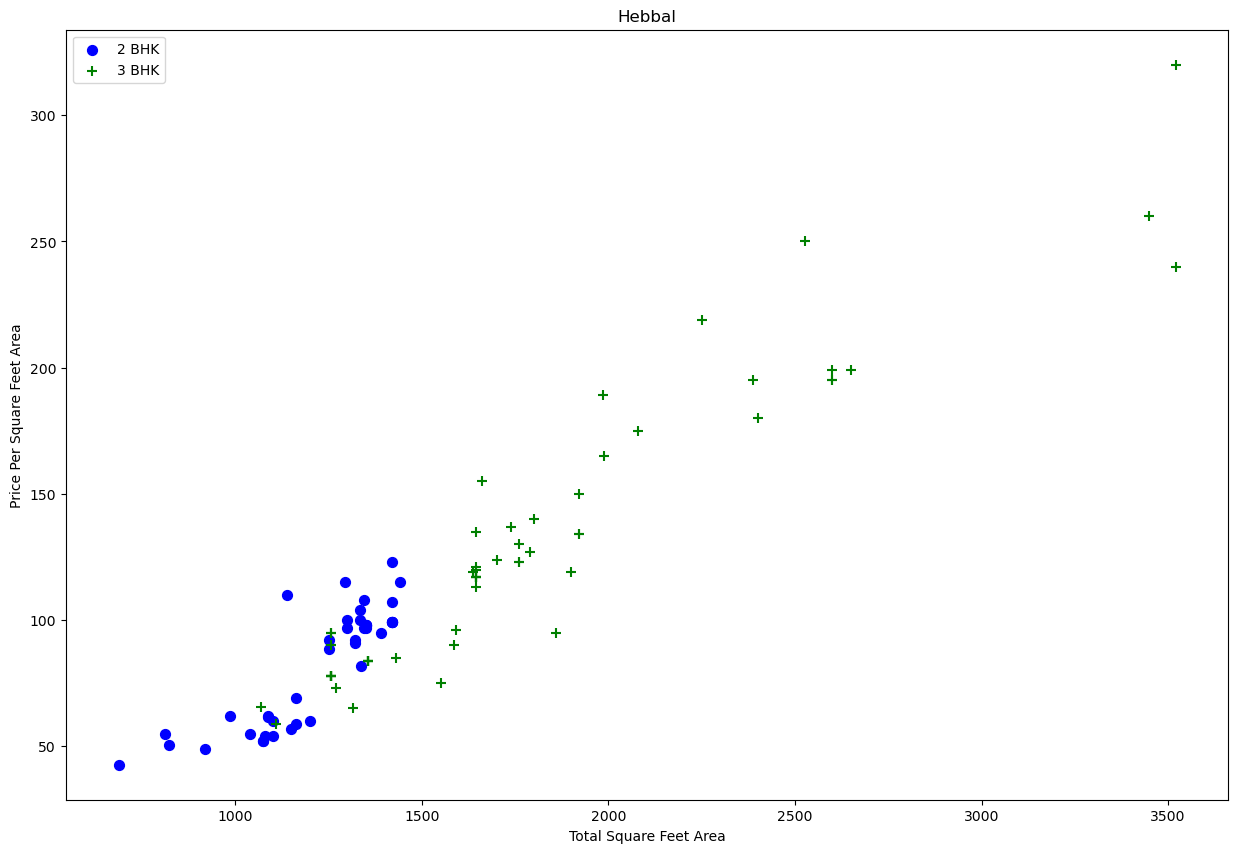

In [45]:
plot_scatter_chart(df5,'Hebbal')

#### We should remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square feet area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e,

{<br>
&emsp;'1' : {<br>
&emsp;&emsp;'mean' : 4000,<br>
&emsp;&emsp;'std' : 2000,<br>
&emsp;&emsp;'count' : 34,<br>
&emsp;},<br>
&emsp;'2' : {<br>
&emsp;&emsp;'mean' : 4300,<br>
&emsp;&emsp;'std' : 2300,<br>
&emsp;&emsp;'count' : 23,<br>
&emsp;},<br>
}<br>

#### Now we can remove those 2BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1BHK apartment

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6 = remove_bhk_outliers(df5)
df6.shape

(7342, 7)

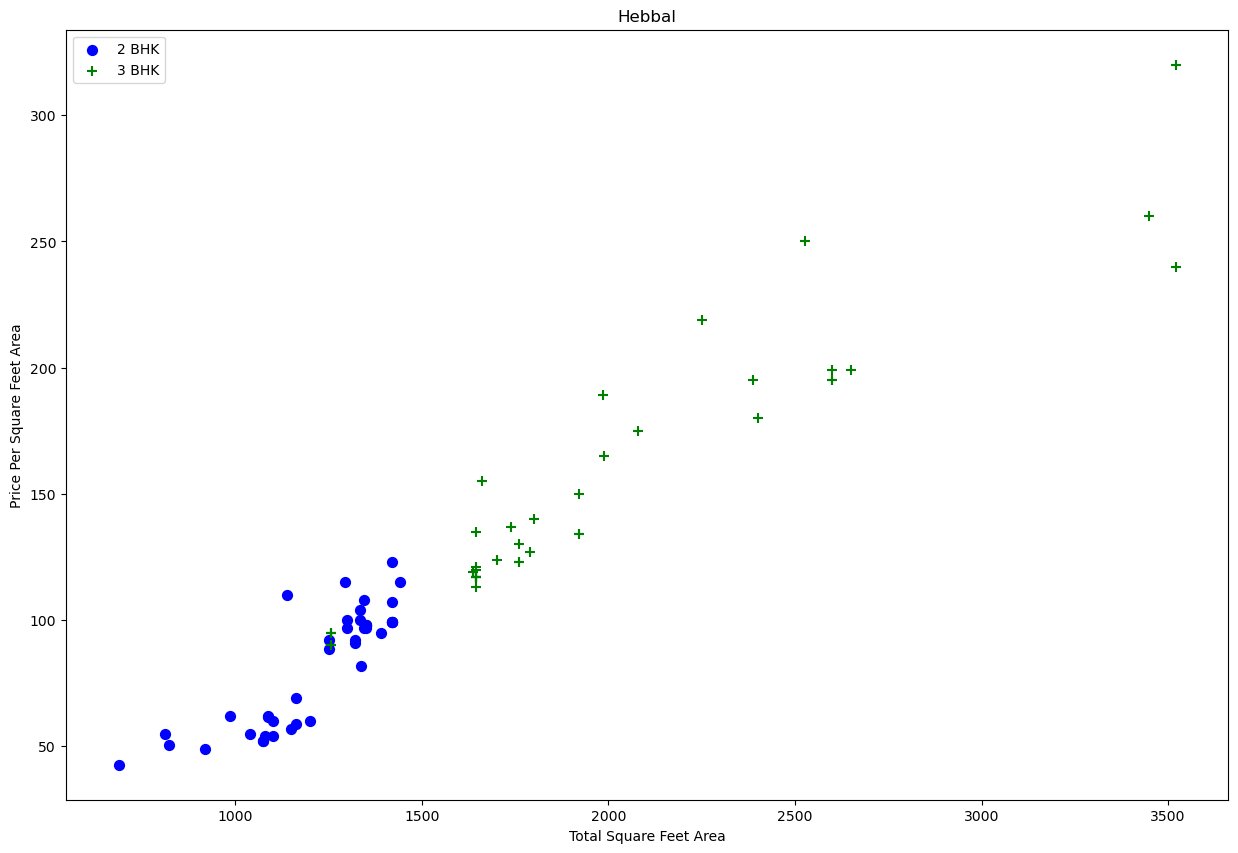

In [44]:
plot_scatter_chart(df6,'Hebbal')

Text(0, 0.5, 'Count')

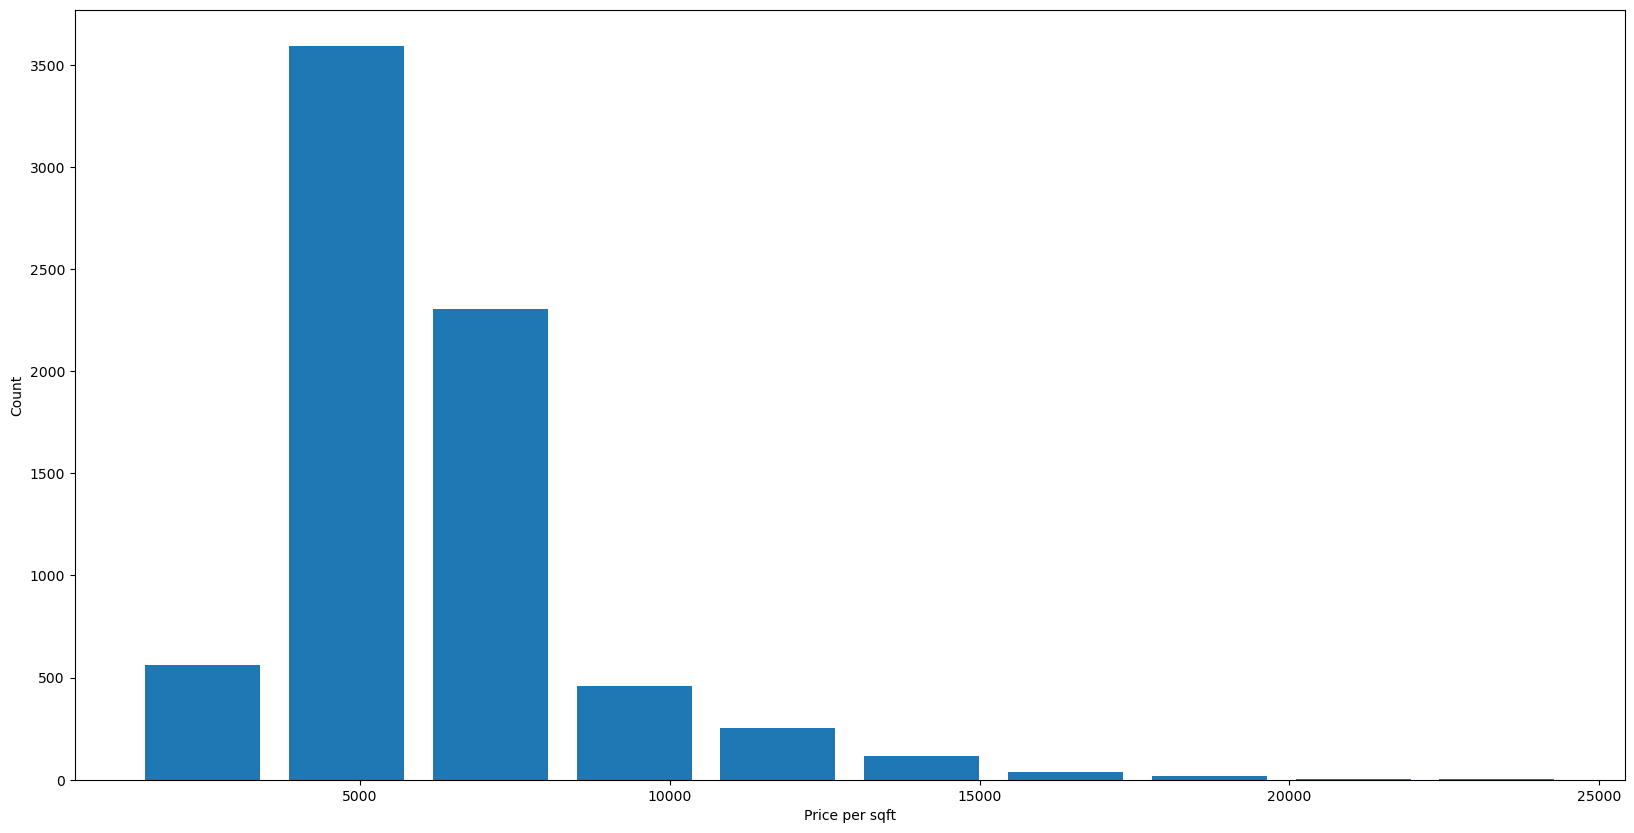

In [48]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

#### Lets explore the bathroom feature

In [50]:
df6.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [52]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### sounds fine, if you have a house of 11 bhk, then 11 bathrooms are OKAY

### But again 2bhk with 5 bathrooms is slightly unusual

#### Lets remove data that consisits of bath >= (bhk+2)

Text(0, 0.5, 'Count')

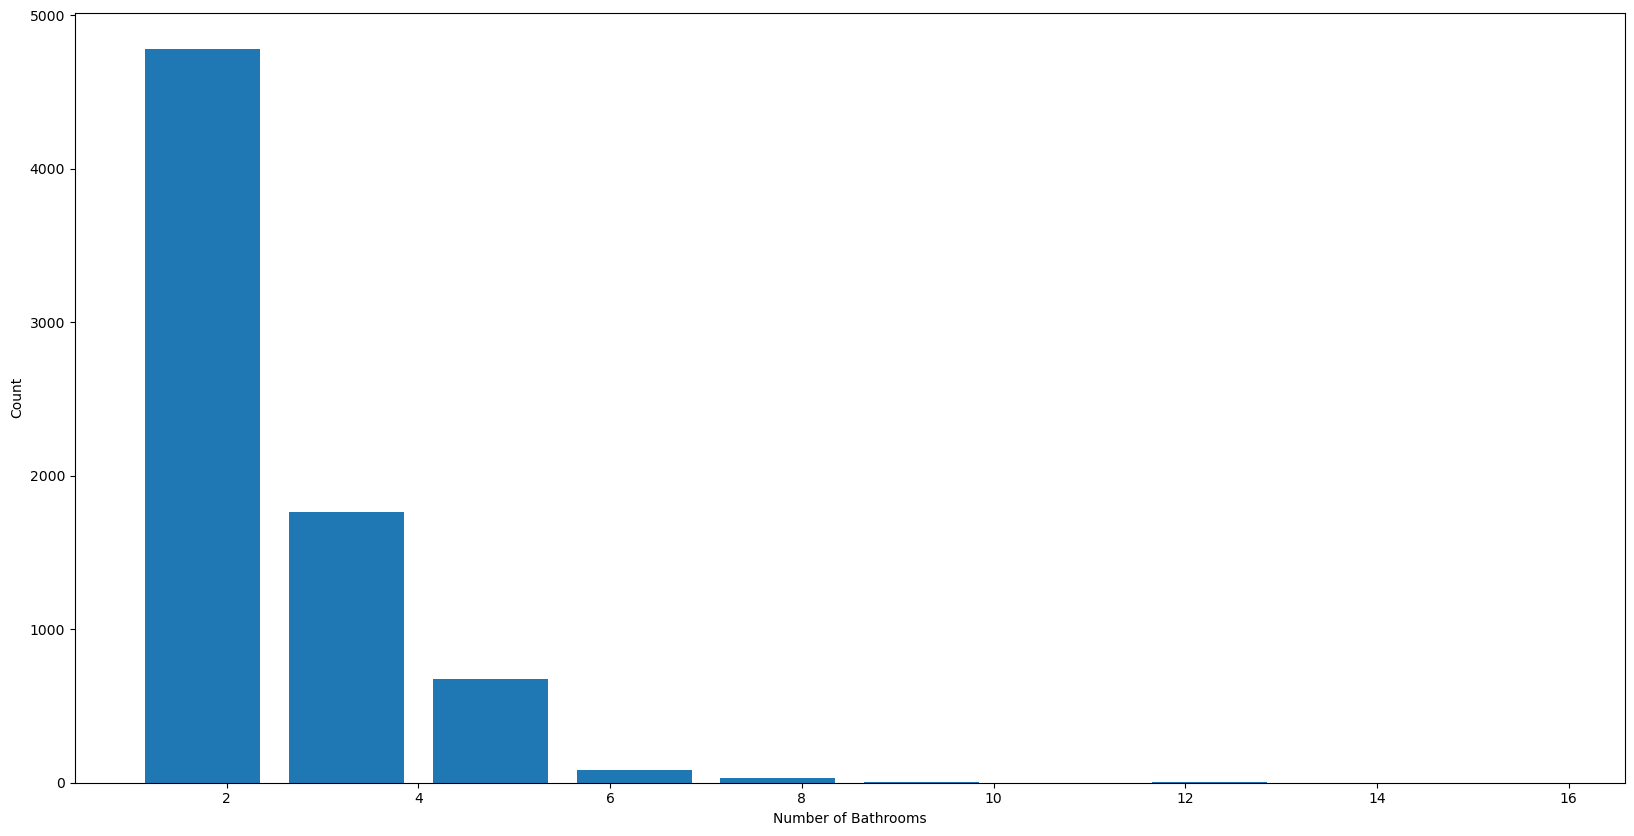

In [60]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [61]:
df6[df6.bath>df6.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [62]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape

(7264, 7)

## Lets remove unnecessary columns

#### size: we have  bhk
#### price_per_sqft: was only for outlier detection, had no other purpose

In [64]:
df8 = df7.drop(['size','price_per_sqft'],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
